<a href="https://colab.research.google.com/github/ArtfulMonster/Machine-Learning/blob/main/Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1

Epoch 100, Training Loss: 3644216573952.0, Validation Loss: 2883881533440.0
Epoch 200, Training Loss: 3644181970944.0, Validation Loss: 2884491018240.0
Epoch 300, Training Loss: 3644182233088.0, Validation Loss: 2884491018240.0
Epoch 400, Training Loss: 3644182233088.0, Validation Loss: 2884491018240.0
Epoch 500, Training Loss: 3644182233088.0, Validation Loss: 2884491018240.0
Epoch 600, Training Loss: 3644182233088.0, Validation Loss: 2884491018240.0
Epoch 700, Training Loss: 3644182233088.0, Validation Loss: 2884491018240.0
Epoch 800, Training Loss: 3644182233088.0, Validation Loss: 2884491018240.0
Epoch 900, Training Loss: 3644182233088.0, Validation Loss: 2884491018240.0
Epoch 1000, Training Loss: 3644182233088.0, Validation Loss: 2884491018240.0
Epoch 1100, Training Loss: 3644182233088.0, Validation Loss: 2884491018240.0
Epoch 1200, Training Loss: 3644182233088.0, Validation Loss: 2884491018240.0
Epoch 1300, Training Loss: 3644182233088.0, Validation Loss: 2884491018240.0
Epoch 14

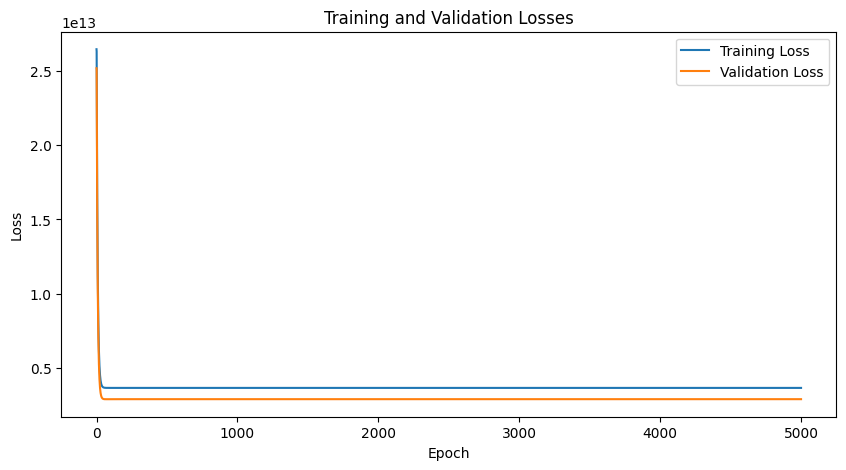

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the housing dataset
Housing = pd.read_csv("Housing.csv")

# Convert strings to float
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Define the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
Housing[varlist] = Housing[varlist].apply(binary_map)

# Extract features and target variable
x = Housing.iloc[:, 1:11].values
y = Housing.iloc[:, 0].values

# Convert to float64 before normalization
x = x.astype('float64')
y = y.astype('float64')

# Normalize features
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

# Convert to PyTorch tensors
tensor_x = torch.tensor(x_normalized, dtype=torch.float32)
tensor_y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Train and Validation split
x_train, x_test, y_train, y_test = train_test_split(tensor_x, tensor_y, test_size=0.20, random_state=0)

# Define the Fully Connected Neural Network with one hidden layer
class FCNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FCNN, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.activation = nn.Tanh()
        self.output_layer = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.activation(self.hidden_layer(x))
        x = self.output_layer(x)
        return x

# Instantiate the model
input_size = x.shape[1]  # Number of features
hidden_size = 32
output_size = 1  # Regression problem, predicting a single value
fcnn_model = FCNN(input_size, hidden_size, output_size)

# Define the optimizer and loss function
optimizer = optim.SGD(fcnn_model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

# Training loop
def training_loop(n_epochs, model, optimizer, loss_fn, x_train, x_test, y_train, y_test):
    train_losses = []
    val_losses = []
    for epoch in range(1, n_epochs + 1):
        # Forward pass
        y_pred_train = model(x_train)
        loss_train = loss_fn(y_pred_train, y_train)
        train_losses.append(loss_train.item())

        y_pred_val = model(x_test)
        loss_val = loss_fn(y_pred_val, y_test)
        val_losses.append(loss_val.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        # Print the training progress
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Training Loss: {loss_train.item()}, Validation Loss: {loss_val.item()}")

    return train_losses, val_losses

# Train the FCNN
train_losses, val_losses = training_loop(n_epochs=5000, model=fcnn_model, optimizer=optimizer, loss_fn=loss_fn, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)

# Plot the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## 1b

Epoch 100, Training Loss: 3670021242880.0, Validation Loss: 2892799934464.0
Epoch 200, Training Loss: 3644207661056.0, Validation Loss: 2883965943808.0
Epoch 300, Training Loss: 3644181970944.0, Validation Loss: 2884474503168.0
Epoch 400, Training Loss: 3644181970944.0, Validation Loss: 2884491018240.0
Epoch 500, Training Loss: 3644181970944.0, Validation Loss: 2884491018240.0
Epoch 600, Training Loss: 3644181970944.0, Validation Loss: 2884491018240.0
Epoch 700, Training Loss: 3644181970944.0, Validation Loss: 2884491018240.0
Epoch 800, Training Loss: 3644181970944.0, Validation Loss: 2884491018240.0
Epoch 900, Training Loss: 3644181970944.0, Validation Loss: 2884491018240.0
Epoch 1000, Training Loss: 3644181970944.0, Validation Loss: 2884491018240.0
Epoch 1100, Training Loss: 3644181970944.0, Validation Loss: 2884491018240.0
Epoch 1200, Training Loss: 3644181970944.0, Validation Loss: 2884491018240.0
Epoch 1300, Training Loss: 3644181970944.0, Validation Loss: 2884491018240.0
Epoch 14

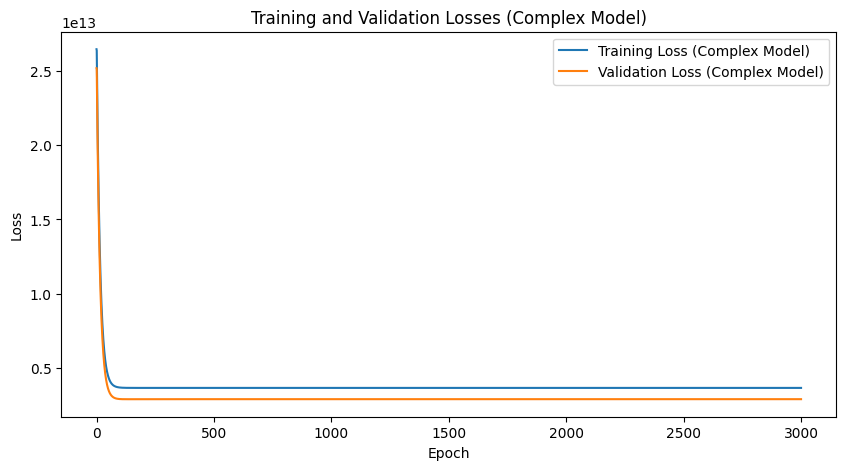

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the housing dataset
Housing = pd.read_csv("Housing.csv")

# Convert strings to float
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Define the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
Housing[varlist] = Housing[varlist].apply(binary_map)

# Extract features and target variable
x = Housing.iloc[:, 1:11].values
y = Housing.iloc[:, 0].values

# Convert to float64 before normalization
x = x.astype('float64')
y = y.astype('float64')

# Normalize features
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

# Convert to PyTorch tensors
tensor_x = torch.tensor(x_normalized, dtype=torch.float32)
tensor_y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Train and Validation split
x_train, x_test, y_train, y_test = train_test_split(tensor_x, tensor_y, test_size=0.20, random_state=0)

# Define the Fully Connected Neural Network with three hidden layers
class FCNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(FCNN, self).__init__()
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_sizes[0])])
        for i in range(1, len(hidden_sizes)):
            self.hidden_layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
        self.activation = nn.Tanh()
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    def forward(self, x):
        for layer in self.hidden_layers:
            x = self.activation(layer(x))
        x = self.output_layer(x)
        return x

# Instantiate the model with increased complexity (32, 64, 16)
input_size = x.shape[1]  # Number of features
hidden_sizes = [32, 64, 16]
output_size = 1  # Regression problem, predicting a single value
fcnn_model_complex = FCNN(input_size, hidden_sizes, output_size)

# Define the optimizer and loss function
optimizer_complex = optim.SGD(fcnn_model_complex.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

# Training loop for the complex model
def training_loop(n_epochs, model, optimizer, loss_fn, x_train, x_test, y_train, y_test):
    train_losses = []
    val_losses = []
    for epoch in range(1, n_epochs + 1):
        # Forward pass
        y_pred_train = model(x_train)
        loss_train = loss_fn(y_pred_train, y_train)
        train_losses.append(loss_train.item())

        y_pred_val = model(x_test)
        loss_val = loss_fn(y_pred_val, y_test)
        val_losses.append(loss_val.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        # Print the training progress
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Training Loss: {loss_train.item()}, Validation Loss: {loss_val.item()}")

    return train_losses, val_losses

# Train the FCNN with increased complexity
train_losses_complex, val_losses_complex = training_loop(n_epochs=3000, model=fcnn_model_complex, optimizer=optimizer_complex, loss_fn=loss_fn, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)

# Plot the training and validation losses for the complex model
plt.figure(figsize=(10, 5))
plt.plot(train_losses_complex, label='Training Loss (Complex Model)')
plt.plot(val_losses_complex, label='Validation Loss (Complex Model)')
plt.title('Training and Validation Losses (Complex Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Problem 2a

In [29]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
from torchvision import transforms
from torch.utils.data import Dataset
from torchvision.io import read_image

# torch.set_printoptions(edgeitems=2, linewidth=75)
# torch.manual_seed(123)

from torchvision import datasets
data_path = '../data-unversioned/p1ch7/'
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ])

cifar10 = datasets.CIFAR10(data_path, train=True, download=True) # <1>
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) # <2>


model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 10),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=False)

val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64,
                                         shuffle=False)

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))



correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Accuracy: %f" % (correct / total))

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Accuracy: %f" % (correct / total))

Files already downloaded and verified
Files already downloaded and verified


TypeError: ignored

## 2b

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
from torchvision import transforms
from torch.utils.data import Dataset
from torchvision.io import read_image

# torch.set_printoptions(edgeitems=2, linewidth=75)
# torch.manual_seed(123)

from torchvision import datasets
data_path = '../data-unversioned/p1ch7/'
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ])

cifar10 = datasets.CIFAR10(data_path, train=True, download=True) # <1>
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) # <2>


model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 10),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=False)

val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64,
                                         shuffle=False)

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))



correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Accuracy: %f" % (correct / total))

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Accuracy: %f" % (correct / total))

100%|██████████| 170498071/170498071 [00:04<00:00, 42433595.59it/s]


Extracting ../data-unversioned/p1ch7/cifar-10-python.tar.gz to ../data-unversioned/p1ch7/
Files already downloaded and verified


NameError: ignored